In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
%pwd

'C:\\Users\\shubham kumar'

In [2]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')


INITIAL DESCRIPTION OF THE DATASET

In [3]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_dataset.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_dataset.shape

(891, 12)

In [6]:
test_dataset.shape


(418, 11)

In [7]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_dataset.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hart, Mr. Benjamin",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


DATA VISUALISATION

In [10]:
train_dataset.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

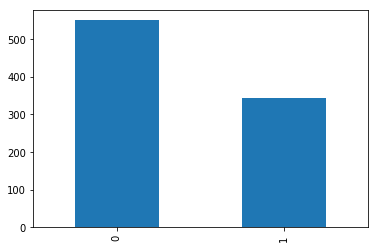

In [11]:
train_dataset.Survived.value_counts().plot(kind='bar')

In [12]:
train_dataset.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

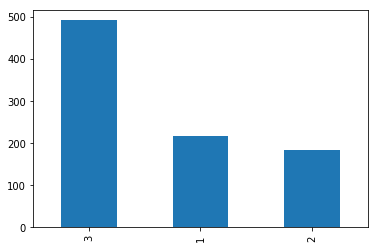

In [13]:
train_dataset.Pclass.value_counts().plot(kind='bar')


In [14]:
pd.crosstab(train_dataset.Pclass,train_dataset.Survived,normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


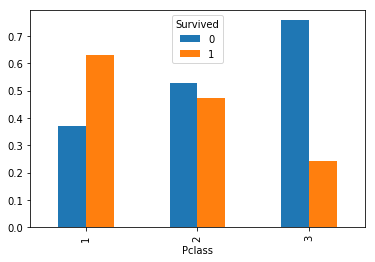

In [15]:
pd.crosstab(train_dataset.Pclass,train_dataset.Survived,normalize= 'index').plot(kind='bar')

sex vs survival

In [16]:
pd.crosstab(train_dataset.Sex,train_dataset.Survived,normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


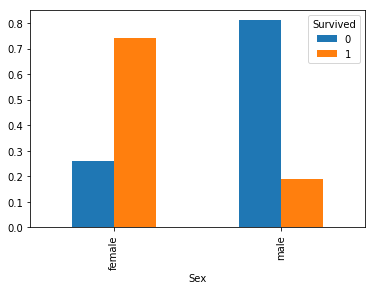

In [17]:
pd.crosstab(train_dataset.Sex,train_dataset.Survived,normalize='index').plot(kind='bar')

Embarked vs Survived

In [18]:
train_dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
pd.crosstab(train_dataset.Embarked,train_dataset.Survived,normalize='index')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


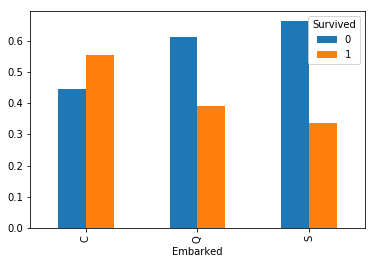

In [20]:
pd.crosstab(train_dataset.Embarked,train_dataset.Survived,normalize='index').plot(kind='bar')

Parch vs Survived

In [21]:
train_dataset.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [22]:
pd.crosstab(train_dataset.Parch,train_dataset.Survived,normalize='index')

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


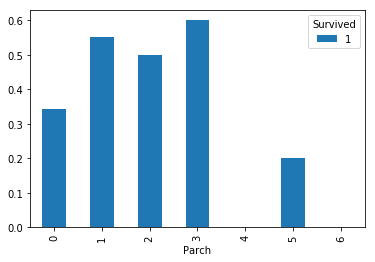

In [23]:
pd.crosstab(train_dataset.Parch,train_dataset.Survived,normalize='index').drop(0,axis=1).plot(kind='bar')

SibSp vs Survived

In [24]:
train_dataset.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
pd.crosstab(train_dataset.SibSp,train_dataset.Survived,normalize=True)

Survived,0,1
SibSp,,
0,0.446689,0.235690
1,0.108866,0.125701
2,0.016835,0.014590
3,0.013468,0.004489
4,0.016835,0.003367
5,0.005612,0.000000
8,0.007856,0.000000


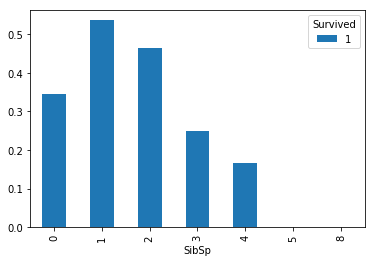

In [26]:
pd.crosstab(train_dataset.SibSp,train_dataset.Survived,normalize='index').drop(0,axis=1).plot(kind='bar')

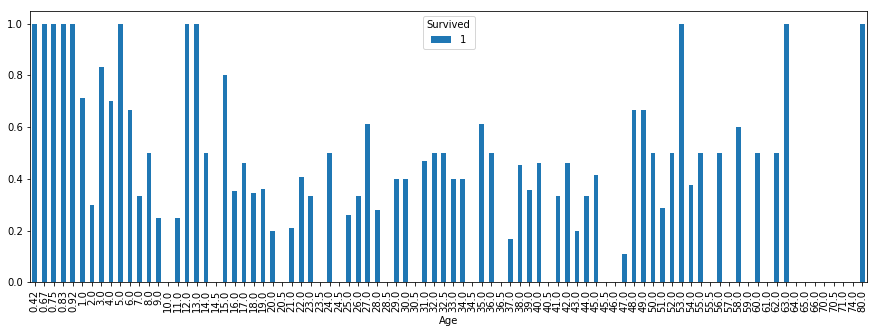

In [27]:
pd.crosstab(train_dataset.Age,train_dataset.Survived,normalize='index').drop(0,axis=1).plot(kind='bar',figsize=(15,5))

In [28]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


FEATURE ENGINEERING

In [29]:
train_dataset.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
train_dataset.Age.median()

28.0

In [31]:
train_dataset.Age.fillna(value=(train_dataset.Age.median()),inplace=True)

In [32]:
AgeGroup=[]
for i in train_dataset.Age:
    if ((i>=0) & (i<15)):
        x=0
    elif ((i>=15) & (i<30)):
        x=1    
    elif ((i>=30) & (i<45)):
        x=2    
    elif ((i>=45) & (i<60)):
        x=3 
    else:
        x=4
    AgeGroup.append(x)  
        

In [33]:
train_dataset['AgeGroup']=AgeGroup

In [34]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [35]:
train_dataset.Sex.replace({'male':1,'female':2},inplace=True)

In [36]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2


In [37]:
train_dataset.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [38]:
train_dataset.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [39]:
train_dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [40]:
train_dataset.Embarked[train_dataset.Embarked.isnull()] ='S'

C:\Users\shubham kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
train_dataset.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [42]:
train_dataset.Embarked.replace({'C':0,'Q':1,'S':2},inplace=True)

In [43]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2


In [44]:
train_dataset['Alone']=((train_dataset.SibSp + train_dataset.Parch)==0).astype(int)

In [45]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,2,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,1


In [46]:
FareGroup=[]
for i in train_dataset.Fare:
    if ((i>=0) & (i<8)):
        x=0
    elif ((i>=8) & (i<15)):
        x=1    
    elif ((i>=15) & (i<30)):
        x=2    
    else:
        x=4
    FareGroup.append(x)
        

In [47]:
train_dataset['FareGroup']=FareGroup

In [48]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Alone,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,0,2,0,4
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,2,2,0,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,1,1


In [49]:
train_dataset.FareGroup.value_counts()

0    241
4    240
1    216
2    194
Name: FareGroup, dtype: int64

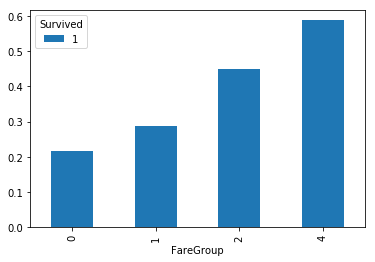

In [50]:
pd.crosstab(train_dataset.FareGroup,train_dataset.Survived,normalize='index').drop(0,axis=1).plot(kind='bar')

In [51]:
Title=[]
for i in train_dataset.Name:
    if i.find('Mr.') != -1:
        Title.append('Mr')
    elif i.find('Mrs.') != -1:
        Title.append('mrs')
    elif i.find('Miss.') != -1:
        Title.append('miss')
    else:
        Title.append('other')

In [52]:
train_dataset['Title'] = Title

In [53]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Alone,FareGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,0,2,0,4,mrs
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,0,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,2,2,0,4,mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,1,1,Mr


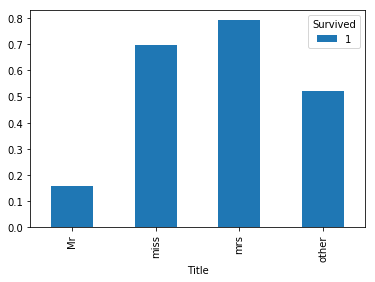

In [54]:
pd.crosstab(train_dataset.Title,train_dataset.Survived,normalize='index').drop(0,axis=1).plot(kind='bar')

In [55]:
train_dataset.Title.replace({'Mr':1,'mrs':2,'miss':3,'other':4},inplace=True)

In [56]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Alone,FareGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,0,2,0,4,2
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,2,2,0,4,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,1,1,1


Removing unnecessary features from the train dataframe.

In [57]:
train_dataset.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [58]:
train_dataset.head()

,Survived,Pclass,Sex,Embarked,AgeGroup,Alone,FareGroup,Title
0,0,3,1,2,1,0,0,1
1,1,1,2,0,2,0,4,2
2,1,3,2,2,1,1,0,3
3,1,1,2,2,2,0,4,2
4,0,3,1,2,2,1,1,1


Preparing test dataset 

In [59]:
test_dataset.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
title=[]
for i in test_dataset.Name:
    if i.find('Mr.') != -1:
        title.append('Mr')
    elif i.find('Mrs.') != -1:
        title.append('mrs')
    elif i.find('Miss.') != -1:
        title.append('miss')
    else:
        title.append('other')
    
    

In [61]:
test_dataset['Title'] = title

In [62]:
test_dataset.Age.fillna(value=(test_dataset.Age.median()),inplace=True)
ageGroup=[]
for i in test_dataset.Age:
    if ((i>=0) & (i<15)):
        x=0
    elif ((i>=15) & (i<30)):
        x=1    
    elif ((i>=30) & (i<45)):
        x=2    
    elif ((i>=45) & (i<60)):
        x=3 
    else:
        x=4
    ageGroup.append(x)
  

In [63]:
test_dataset['AgeGroup'] = ageGroup

In [64]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,mrs,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,4
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,mrs,1


In [65]:
test_dataset['Alone']=((test_dataset.SibSp + test_dataset.Parch)==0).astype(int)

In [66]:
fareGroup=[]
for i in test_dataset.Fare:
    if ((i>=0) & (i<8)):
        x=0
    elif ((i>=8) & (i<15)):
        x=1    
    elif ((i>=15) & (i<30)):
        x=2    
    else:
        x=4
    fareGroup.append(x)
    
  
        

In [67]:
test_dataset['FareGroup'] = fareGroup

In [68]:
test_dataset.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [69]:
test_dataset.Embarked.replace({'C':0,'Q':1,'S':2},inplace=True)

In [70]:
test_dataset.Title.replace({'Mr':1,'mrs':2,'miss':3,'other':4},inplace=True)

In [71]:
test_dataset.Sex.replace({'male':1,'female':2},inplace=True)

In [72]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,Alone,FareGroup
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,1,2,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,2,2,3,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,1,4,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,1,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,NaN,2,2,1,0,1


In [73]:
test_dataset.drop(['Name','Age','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [74]:
test_dataset.head()

,PassengerId,Pclass,Sex,Embarked,Title,AgeGroup,Alone,FareGroup
0,892,3,1,1,1,2,1,0
1,893,3,2,2,2,3,0,0
2,894,2,1,1,1,4,1,1
3,895,3,1,2,1,1,1,1
4,896,3,2,2,2,1,0,1


PREDICTION AND ACCURACY

In [75]:
X_test = test_dataset.drop('PassengerId',axis=1)

In [76]:
X_train = train_dataset.drop('Survived',axis=1)

In [77]:
Y_train = train_dataset.Survived

Logistic Regresion

In [78]:
model = LogisticRegression()

In [79]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
Y_pred_log = model.predict(X_test)

In [81]:
acc_log = round(model.score(X_train, Y_train) * 100, 2)
acc_log

79.909999999999997

Support Vector Machine

In [82]:
svc = SVC()

In [83]:
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
Y_pred_svc = svc.predict(X_test)

In [100]:
acc_svc = round(svc.score(X_train, Y_train) * 100,2)

In [101]:
acc_svc

83.049999999999997

Decision Tree

In [87]:
decision_tree = DecisionTreeClassifier()

In [88]:
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [89]:
Y_pred_decision_tree = decision_tree.predict(X_test)

In [106]:
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100,2)

In [107]:
acc_decision_tree

87.540000000000006

KNN

In [92]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [93]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [94]:
y_pred_knn = knn.predict(X_test)

In [95]:
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.75

Since,Decision Tree gives highest accuracy

In [96]:
predicted_result = pd.DataFrame({'PassengerId': test_dataset["PassengerId"],"Survived": Y_pred_decision_tree})

In [97]:
predicted_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,1


In [109]:
predicted_result.to_csv('output.csv', sep=',')
